<a href="https://colab.research.google.com/github/tesygithub/Machine-Learning/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  **NETFLIX MOVIES AND TV SHOWS CLUSTERING**



# **Project Summary -**

Write the summary here within 500-600 words.

This dataset consists of TV shows and movies available on Netflix as of 2019. The dataset is collected from Fixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings. According to the graph we have 5377(69.14%) movies. And 2400(30.86%) as TV Show in this dataset. According to plot we can say Raul Campos and Jan Sulter collectively have the most content on Netflix. Marcus Raboy have the second most content on Netflix. Now we can say in this data Anupam Kher having 38 number of listing.takahiro Sakurai is the second most listed actor on netflix.Shah Rukh Khan is the 3rd most listed actor on Netflix. According to the plot we can understand United States have 2080 Movies and 975 TV Show. INDIA have second most listed country with 852 movies and 71 TV Show on Netflix.

We have so many content release in October (785), November (738), December (833) and January (757) may be it is because of Holiday season. The number of release has significantly increased after 2015 to 2020.

But sudden drop in 2021 may be it is because of covid 19. We have 744 movies and 268 TV Show release in 2017Also 734 movies and 386 TV Show release in 2018.82%(6431) of the content was released between 2010 and 2021.17.28%(1346) of the content was released before 2010.Most number of movies rated TV-MA i.e. Adult Rating. Most number of TV Shows rated TV-MA i.e. Adult Rating. We have most listed duration as season 1 with 1608 listing. We have second most listed duration as season 2 with 378 listing. Mainly the movie duration is in b/w 55 to 150 minutes. Most of the movies list for 90 to 120 minutes. In Movies Documentaries is the most popular genera on Netflix.

Comedy is the second most popular genera on netflix.In TV Shows Drama is the most popular genera.

International TV shows is the second most popular genere.Most repeated words in title column are love, Christmas, World, Man, and life. Most repeated words in the description of the TV shows and movies are Family, new, Love, Life, mother, find.

Data pre-processing

For train the model we use description column, listed_in column, rating column, country column, title column, director column, cast column. We performed Text cleaning as our next step. Convert all words in lowercase. We performed Stemming as our next step. We remove all stopwords.Also use stemming function. We performed TF-IDF vectorizer.Term frequency-inverse document frequency is a text vectorizer that transforms the text into a usable vector. Applying PCA-Principal Component Analysis to reduce dimensions. We will use 3000 components.

 Applying models

WE use Elbow method for finding k values. Also use Silhouette Score for best score. Also use Dendogram for finding the value of clusters. Use Agglomerative Clustering. Use KMeans Clustering. here are few clusters with there word cloud graph.


# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

# ***Let's Begin !***

## ***1. Know Your Data***

1.   List item
2.   List item



### Import Libraries

In [1]:
# import the dependancy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm
import scipy.cluster.hierarchy as sch
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import cosine_similarity
import difflib

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Dataset Loading

In [2]:
# import the dataset
data = pd.read_csv('/content/Copy of Copy of NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

### Dataset First View

In [3]:
# print first five rows
data.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

In [4]:
# print last five rows
data.tail()

show_id     type                                    title     director  \
7782   s7783    Movie                                     Zozo  Josef Fares   
7783   s7784    Movie                                   Zubaan  Mozez Singh   
7784   s7785    Movie                        Zulu Man in Japan          NaN   
7785   s7786  TV Show                    Zumbo's Just Desserts          NaN   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS     Sam Dunn   

                                                   cast  \
7782  Imad Creidi, Antoinette Turk, Elias Gergi, Car...   
7783  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   
7784                                            Nasty C   
7785                         Adriano Zumbo, Rachel Khoo   
7786                                                NaN   

                                                country          date_added  \
7782  Sweden, Czech Republic, United Kingdom, Denmar...    October 19, 2020   
7783                                              India       March 2, 2019   
7784                                                NaN  September 25, 2020   
7785                                          Australia    October 31, 2020   
7786              United Kingdom, Canada, United States       March 1, 2020   

      release_year rating  duration  \
7782          2005  TV-MA    99 min   
7783          2015  TV-14   111 min   
7784          2019  TV-MA    44 min   
7785          2019  TV-PG  1 Season   
7786          2019  TV-MA    90 min   

                                              listed_in  \
7782                       Dramas, International Movies   
7783     Dramas, International Movies, Music & Musicals   
7784  Documentaries, International Movies, Music & M...   
7785                 International TV Shows, Reality TV   
7786                    Documentaries, Music & Musicals   

                                            description  
7782  When Lebanon's Civil War deprives Zozo of his ...  
7783  A scrappy but poor boy worms his way into a ty...  
7784  In this documentary, South African rapper Nast...  
7785  Dessert wizard Adriano Zumbo looks for the nex...  
7786  This documentary delves into the mystique behi...

### Dataset Rows & Columns count

In [5]:
# Check the shape of the dataset
data.shape

(7787, 12)

### Data describe

In [6]:
#To check distribution describing dataset
data.describe(include='all')

show_id   type                                    title  \
count     7787   7787                                     7787   
unique    7787      2                                     7787   
top      s7787  Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   
freq         1   5377                                        1   
mean       NaN    NaN                                      NaN   
std        NaN    NaN                                      NaN   
min        NaN    NaN                                      NaN   
25%        NaN    NaN                                      NaN   
50%        NaN    NaN                                      NaN   
75%        NaN    NaN                                      NaN   
max        NaN    NaN                                      NaN   

                      director                cast        country  \
count                     5398                7069           7280   
unique                    4049                6831            681   
top     Raúl Campos, Jan Suter  David Attenborough  United States   
freq                        18                  18           2555   
mean                       NaN                 NaN            NaN   
std                        NaN                 NaN            NaN   
min                        NaN                 NaN            NaN   
25%                        NaN                 NaN            NaN   
50%                        NaN                 NaN            NaN   
75%                        NaN                 NaN            NaN   
max                        NaN                 NaN            NaN   

             date_added  release_year rating  duration      listed_in  \
count              7777   7787.000000   7780      7787           7787   
unique             1565           NaN     14       216            492   
top     January 1, 2020           NaN  TV-MA  1 Season  Documentaries   
freq                118           NaN   2863      1608            334   
mean                NaN   2013.932580    NaN       NaN            NaN   
std                 NaN      8.757395    NaN       NaN            NaN   
min                 NaN   1925.000000    NaN       NaN            NaN   
25%                 NaN   2013.000000    NaN       NaN            NaN   
50%                 NaN   2017.000000    NaN       NaN            NaN   
75%                 NaN   2018.000000    NaN       NaN            NaN   
max                 NaN   2021.000000    NaN       NaN            NaN   

                                              description  
count                                                7787  
unique                                               7769  
top     Multiple women report their husbands as missin...  
freq                                                    3  
mean                                                  NaN  
std                                                   NaN  
min                                                   NaN  
25%                                                   NaN  
50%                                                   NaN  
75%                                                   NaN  
max                                                   NaN

### Dataset Information

In [7]:
# print the info of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


* We have **7787** **rows** and **12** **columns** provided in the data.

* In the dataset we have **11 object** columns and **1 integer** column as **release_year**.

## **2. Data Wrangling**

#### Missing Values/Null Values

In [8]:
# Check for null values %.
for col in data.columns:
  null_rate = data[col].isnull().sum() / len(data) * 100
  if null_rate > 0:
    print(f'The null values in {col} column are  {data[col].isnull().sum()} Percentage:- {null_rate}%')

The null values in director column are  2389 Percentage:- 30.679337357133683%
The null values in cast column are  718 Percentage:- 9.220495697958135%
The null values in country column are  507 Percentage:- 6.51085141903172%
The null values in date_added column are  10 Percentage:- 0.1284191601386927%
The null values in rating column are  7 Percentage:- 0.08989341209708489%


<Axes: >

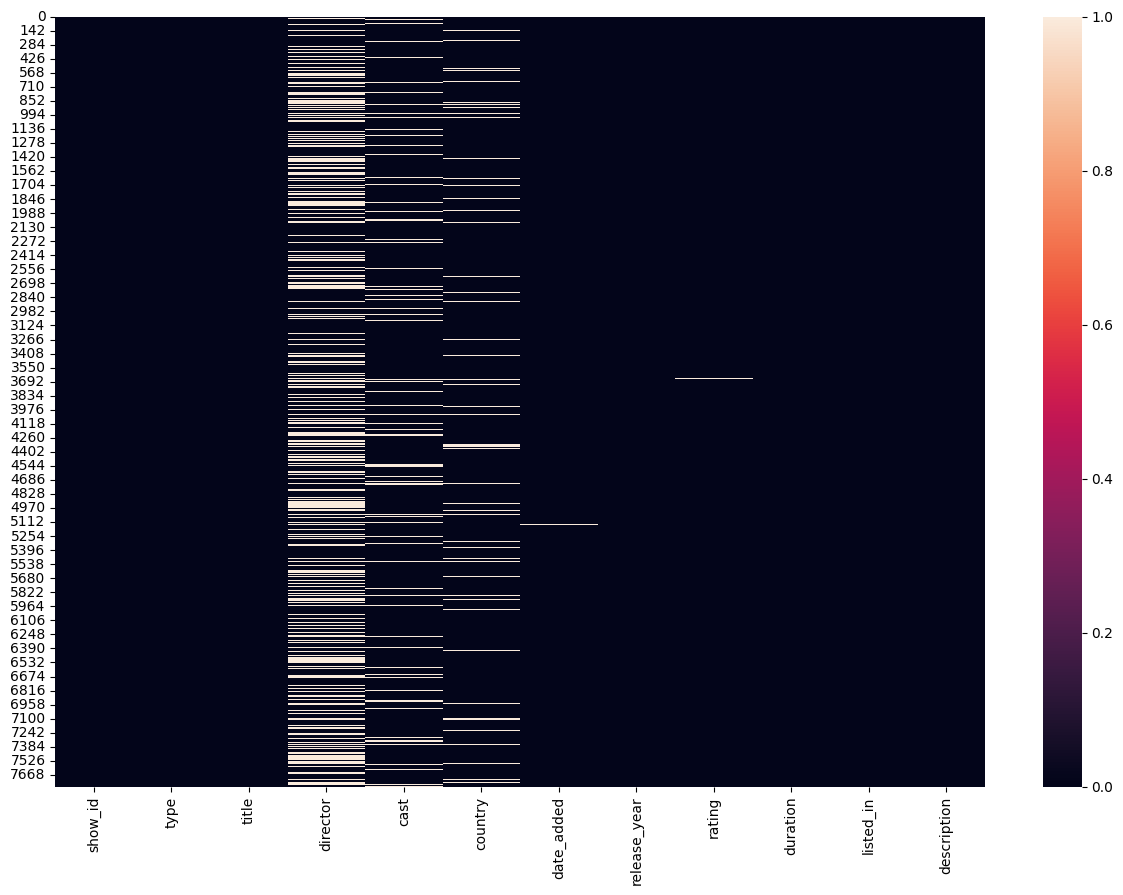

In [9]:
# let's visualizing  the null values
plt.figure(figsize=(15,10))
sns.heatmap(data.isna())

#### Null value treatment

In [10]:
#Replacing null values in 'director' column with 'unknown'
data['director'].replace(np.nan, "unknown",inplace  = True)

#Replacing null values in 'cast' column with 'unknown'
data['cast'].replace(np.nan, "unknown",inplace  = True)

#Replacing null values in 'country' column with 'Mode'
data['country']= data['country'].fillna(data['country'].mode()[0])

#Replacing null values in 'rating' column with 'Mode'
data['rating']= data['rating'].fillna(data['rating'].mode()[0])

# Remove all null values in date_added.
data.dropna(subset=['date_added'], inplace=True)

<ipython-input-10-200a627fcb23>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['director'].replace(np.nan, "unknown",inplace  = True)
<ipython-input-10-200a627fcb23>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

In [11]:
#Check null values
data.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

#### Duplicate Values

In [12]:
data.duplicated().sum()

np.int64(0)

### What did you know about your dataset?

**1- Data Overview**
  * We have **7787** **rows** and **12** **columns** provided in the data.

  * In the dataset we have **11 object** columns and **1 integer** column as **release_year**.

**2- Checking the null values**
  * Fist we have **2389** null values in **director** column.We have almost 30% null values in this column so we can not use this column in model training but we can use it in EDA.

  * We have **718** null values in **cast** column. and it can be replaced with 'unknown'.

  * we have **507** null values in **country** column.Replacing nulls with 'mode'.

  * Also we have **10** null values in **date_added** column.we have few rows of date_added so we can 'drop' these rows.

  * Also we have **7** null values in **rating** column.Replacing nulls with 'mode'.

**3- Check Duplicate values in the dataset**

  * we do not have any Duplicate values in the dataset.

## ***3. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

### **Analysis 'type' column**

In [13]:
data['type'].value_counts()

type
Movie      5377
TV Show    2400
Name: count, dtype: int64

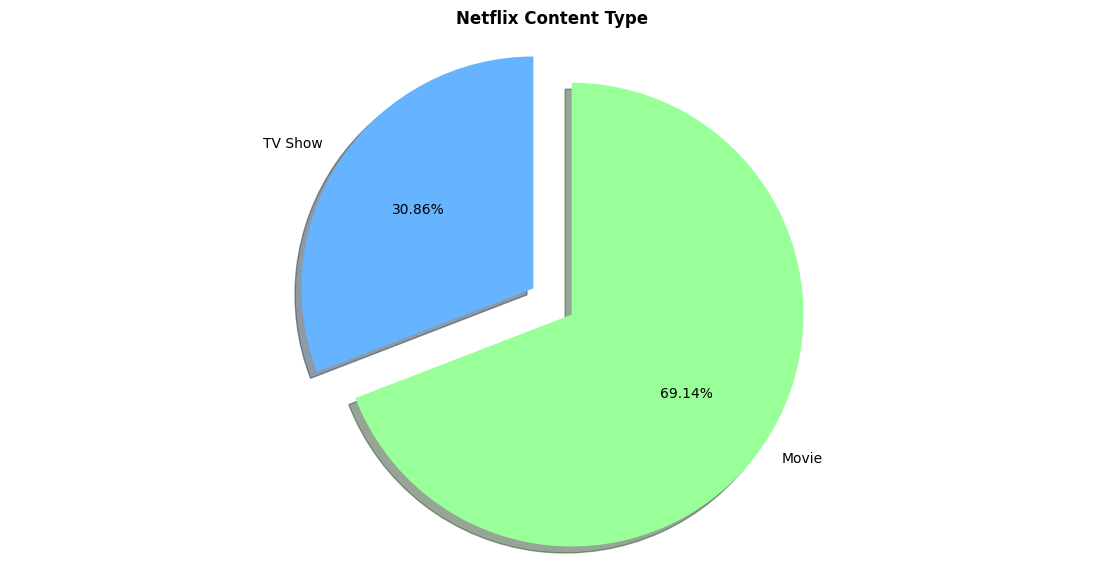

In [14]:
# Plotting Pie Chart between the TV-Shows and Movies.
plt.figure(figsize=(14,7))
colors = ['#66b3ff','#99ff99']
content=['TV Show','Movie']
plt.pie(data['type'].value_counts().sort_values(),labels=content,explode=[0.1,0.1],autopct='%1.2f%%',startangle=90,shadow=True,colors=colors)
plt.title('Netflix Content Type',fontweight='bold')
plt.axis('equal')
plt.show()

**type column**
  * According to the graph we have **5377**(69.14%) **movies**.

  * And **2400**(30.86%) as **TV Show** in this dataset.

### **Analysis 'director' column:-**

**Find top 10 director from the dataset**

In [15]:
#creating copy for plot
director=data.copy()

#removing unknown
direc1=director[director['director']!='unknown']

<ipython-input-16-4374b6518a2e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='director',data=direc1,order=direc1.director.value_counts().head(10).index,palette="gist_rainbow")


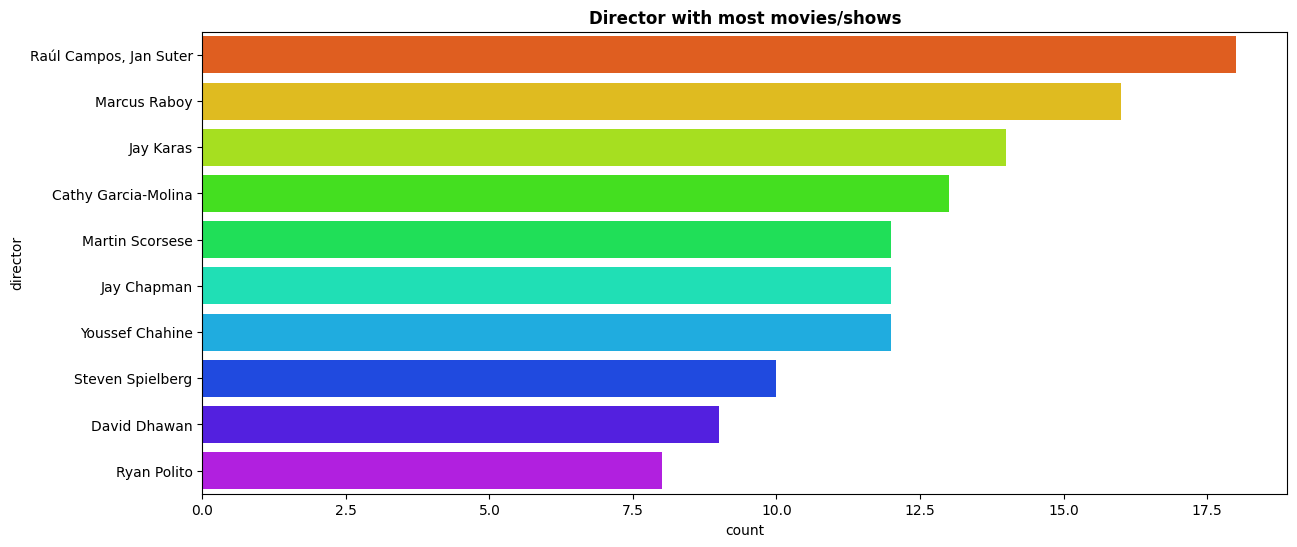

In [16]:
#plot for top 10 director

plt.figure(figsize = (14,6))
sns.countplot(y='director',data=direc1,order=direc1.director.value_counts().head(10).index,palette="gist_rainbow")
plt.title('Director with most movies/shows',fontweight="bold")
plt.show()

**'director' column**
  * According to plot we can say **Raul Campos** and **Jan Sulter** collectively have the **most content** on Netflix.
  * **Marcus Raboy** have the **second most content** on Netflix.

### **Analysis 'cast' column:-**

**Find top 10 actor from the dataset**

In [17]:
#creating copy for plot
actor=data.copy()

#removing unknown
actor1=actor[actor['cast']!='unknown']

In [18]:
# Create a list of all the actors in the data.
def getactorname(actor1):
  actor_list = {}  # dict to store the count for each actor.
  temp_list = []   # list to store all the names.
  cast_list = list(actor1['cast'])  # define the data we intend to use.
  for i in range(len(cast_list)):
    temp_list.extend(str(cast_list[i]).split(','))
  for i in temp_list:
    if i not in actor_list:
      actor_list[i] = temp_list.count(i)
  return actor_list

In [19]:
# Create dataframe for list of actors.
actor_list = pd.DataFrame([getactorname(actor1)]).T.reset_index()
actor_list = actor_list.sort_values(0, ascending=False)

In [20]:
# Check all top 10 actors who act most number of movies in this dataset
actor_list.head(10)

index   0
1295        Anupam Kher  38
193    Takahiro Sakurai  28
4040     Shah Rukh Khan  27
2204            Om Puri  27
741         Boman Irani  25
2507       Paresh Rawal  24
8463      Andrea Libman  24
4369          Yuki Kaji  23
2202       Akshay Kumar  22
4995       Vincent Tong  22

In [21]:
# Plot it.
top_10_actors = actor_list.head(10)
top_10_actors.rename(columns={'index':'Actors name', 0:'Count'}, inplace=True)

fig = px.bar(top_10_actors, x='Actors name', y='Count', text_auto=True,
             color='Count', color_continuous_scale=['#564d4d', '#db0000'])

fig.update_traces(textangle=0, cliponaxis=False)
fig.update_layout(
    title={
        'text': 'Actors with most content on platform.',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
        autosize=False,
        width=900,
        height=500)
# fig.show()
fig.show()

<ipython-input-21-e90d9152164f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_actors.rename(columns={'index':'Actors name', 0:'Count'}, inplace=True)


**'cast' column**
  * Now we can say in this data **Anupam Kher** having **38 number** of listing.
  * **Takahiro Sakurai** is the **second** most listed actor on netflix.
  * Shah Rukh Khan is the **3rd** most listed actor on netflix.

### **Analysis 'country' column:-**

**Top 15 countries with most contents**

In [22]:
# try to check count of country for type
country_and_type=data.groupby(['country','type'])['country'].count().unstack()


# Sorting by column Movie and then TV Show
country_and_type.sort_values(by=['Movie','TV Show'], ascending=False).head(15)

type                            Movie  TV Show
country                                       
United States                  2080.0    975.0
India                           852.0     71.0
United Kingdom                  193.0    203.0
Canada                          118.0     59.0
Spain                            89.0     45.0
Egypt                            89.0     12.0
Turkey                           73.0     27.0
Philippines                      70.0      1.0
Japan                            69.0    156.0
France                           69.0     46.0
Indonesia                        68.0      2.0
Mexico                           65.0     35.0
Nigeria                          62.0      8.0
United Kingdom, United States    52.0     12.0
Hong Kong                        49.0      3.0

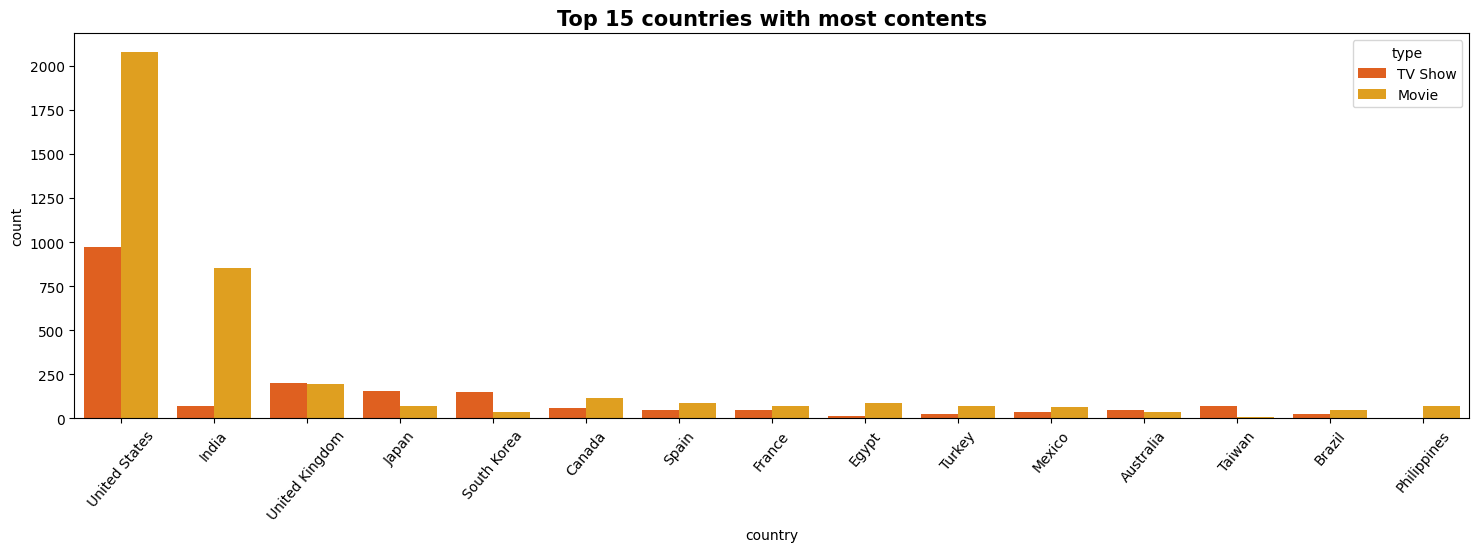

In [23]:
#Analysing top15 countries with most content
plt.figure(figsize=(18,5))
sns.countplot(x=data['country'],palette="autumn",order=data['country'].value_counts().index[0:15],hue=data['type'])

# plot
plt.xticks(rotation=50)
plt.title('Top 15 countries with most contents', fontsize=15, fontweight='bold')
plt.show()

**'country' column**
  * According to the plot we can understanding **United States** have **2080** **Movies** and	**975 TV Show**.

  * **INDIA** have **second** most listed country with **852** **movies** and	**71 TV Show** on Netflix.

### **Analysis 'date_added' column:-**




**Let's create few other featers using date_added column**

In [24]:
#feature engineering
#getting date in the right format and year/month extraction
data['date_added'] = pd.to_datetime(data['date_added'], format='%B %d, %Y', errors='coerce')

# Extract year
data['year_added'] = data['date_added'].dt.year

# Extract month
data['month_added'] = data['date_added'].dt.month

#### **month wise Content release analysis:-**

In [25]:
# check the month wise Content release
data['month_added'].value_counts()

month_added
12.0    817
10.0    780
1.0     746
11.0    730
3.0     661
9.0     614
8.0     612
4.0     596
7.0     592
6.0     538
5.0     537
2.0     466
Name: count, dtype: int64

<ipython-input-26-40eb263cbba9>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




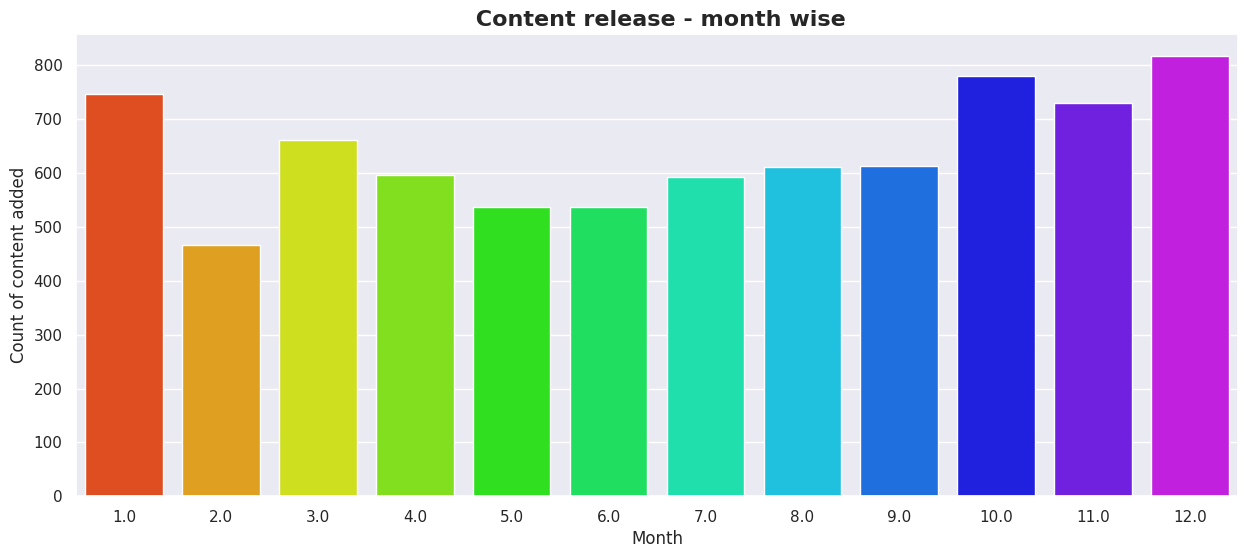

In [26]:
#plot for month wise content release
sns.set(rc={'figure.figsize':(15,6)})
sns.countplot(x='month_added',data=data,palette="gist_rainbow")

plt.title(' Content release - month wise',size='16',fontweight="bold")
plt.xlabel('Month')
plt.ylabel('Count of content added')
plt.show()

**month wise Content release**
  * We have so many content relese in **October**(785), **November**(738), **December**(833) and **January**(757) may be it is because of **Holiday** season.

#### **year wise Content release analysis:-**

In [27]:
# check the year wise Content release
data['year_added'].value_counts()

year_added
2019.0    2136
2020.0    2008
2018.0    1661
2017.0    1201
2016.0     432
2021.0     117
2015.0      79
2014.0      24
2011.0      13
2013.0      10
2012.0       3
2008.0       2
2009.0       2
2010.0       1
Name: count, dtype: int64

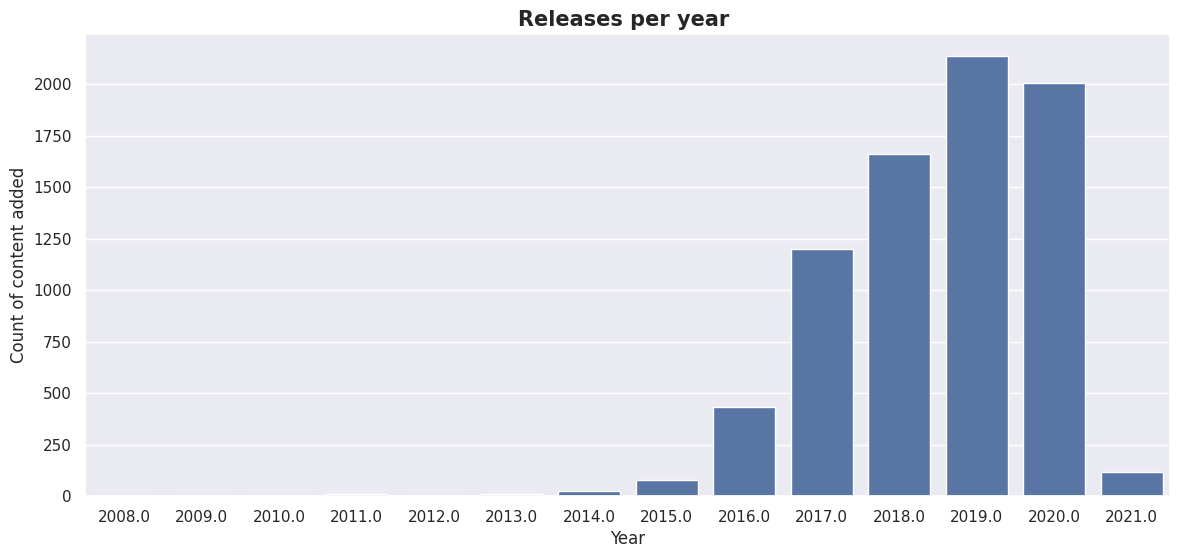

In [28]:
#plot for year wise content release
sns.set(rc={'figure.figsize':(14,6)})
sns.countplot(x='year_added',data=data)

plt.title('Releases per year ',size='15',fontweight="bold")
plt.xlabel('Year')
plt.ylabel('Count of content added')
plt.show()

**year wise Content release**
  * The number of release have significantly increased after **2015** to **2020**.
  * But sudden drop in **2021** may be it is because of **covid 19**.

### **Analysis 'release_year' column:-**

In [29]:
# try to check count of release_year for type
relese_and_type=data.groupby(['release_year','type'])['release_year'].count().unstack()


# Sorting by column Movie and then TV Show
relese_and_type.sort_values(by=['Movie','TV Show'], ascending=False).head(15)

type          Movie  TV Show
release_year                
2017          744.0    268.0
2018          734.0    386.0
2016          642.0    239.0
2019          582.0    414.0
2020          411.0    457.0
2015          382.0    157.0
2014          244.0     90.0
2013          202.0     64.0
2012          158.0     60.0
2010          136.0     36.0
2011          127.0     39.0
2009          103.0     34.0
2008          102.0     22.0
2006           72.0     13.0
2007           72.0     13.0

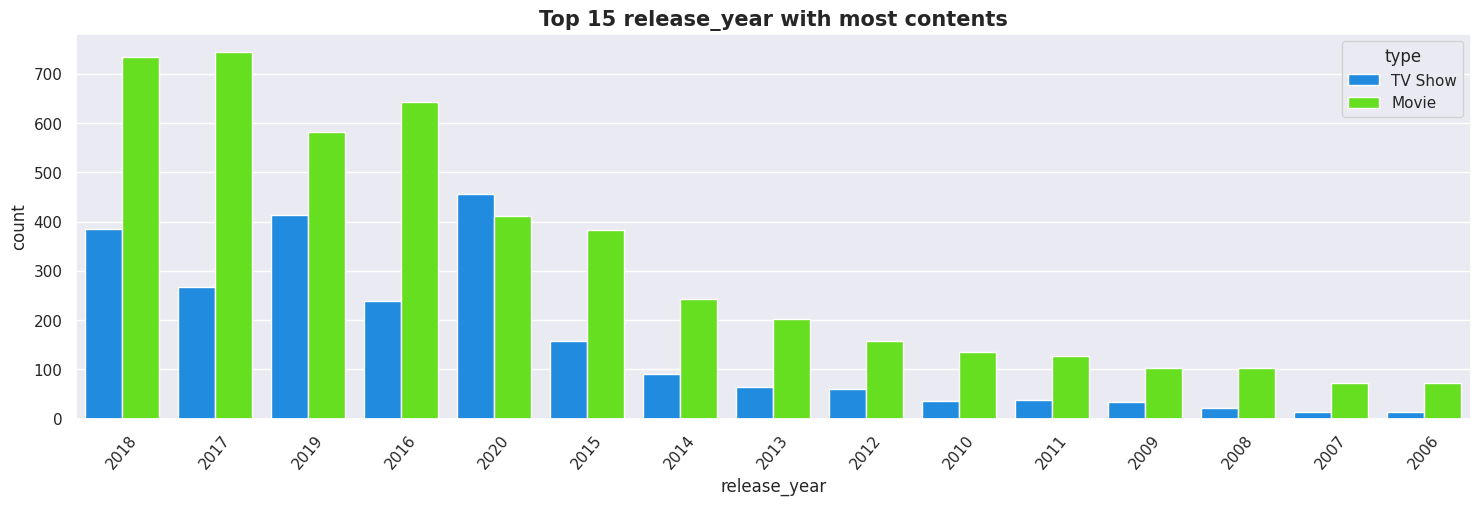

In [30]:
#Analysing top15 release_year with most content
plt.figure(figsize=(18,5))
sns.countplot(x=data['release_year'],palette="gist_rainbow_r",order=data['release_year'].value_counts().index[0:15],hue=data['type'])

# plot
plt.xticks(rotation=50)
plt.title('Top 15 release_year with most contents', fontsize=15, fontweight='bold')
plt.show()

**'release_year' column**
  * We have **744** movies and	**268** TV Show relese in **2017**.

  * Also **734** movies and	**386** TV Show relese in **2018**.

  * **82**%(6431) of the content was released between **2010** and **2021**.*
  * **17.28%**(1346) of the content was released before 2010.*

### **Analysis 'rating' column:-**

In [31]:
# try to check count of rating for type movie and TV Show
rating_and_type=data.groupby(['rating','type'])['rating'].count().unstack()


# Sorting by column Movie and then TV Show
rating_and_type.sort_values(by=['Movie','TV Show'], ascending=False)

type       Movie  TV Show
rating                   
TV-MA     1850.0   1018.0
TV-14     1272.0    656.0
R          663.0      2.0
TV-PG      505.0    299.0
PG-13      386.0      NaN
PG         247.0      NaN
TV-Y       117.0    162.0
TV-G       111.0     83.0
TV-Y7       95.0    175.0
NR          79.0      4.0
G           39.0      NaN
TV-Y7-FV     5.0      1.0
UR           5.0      NaN
NC-17        3.0      NaN

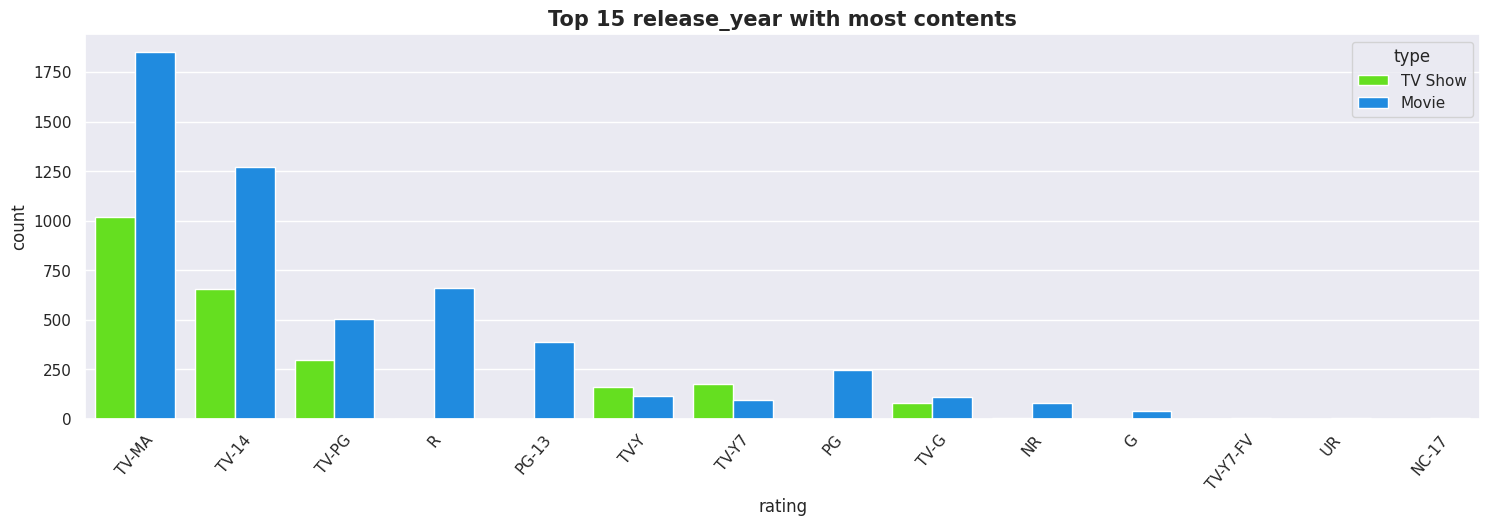

In [32]:
#Analysing  rating with most content
plt.figure(figsize=(18,5))
sns.countplot(x=data['rating'],palette="gist_rainbow",order=data['rating'].value_counts().index[:],hue=data['type'])

# plot
plt.xticks(rotation=50)
plt.title('Top 15 release_year with most contents', fontsize=15, fontweight='bold')
plt.show()

**'Rating" column**

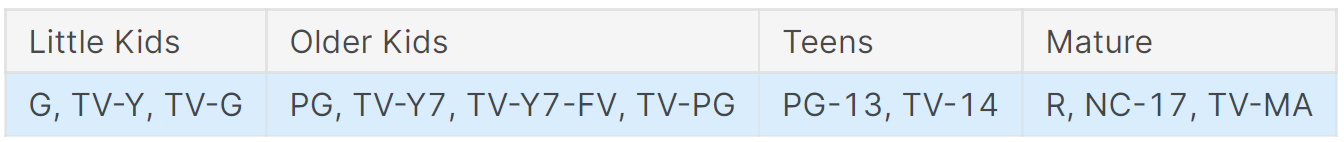
  * Most number of **movies** rated **TV-MA** i.e. **Adult Rating**.
  * Most number of **TV Shows** rated **TV-MA** i.e. **Adult Rating**.

### **Analysis 'duration' column:-**

In [33]:
# Create subsets for tv shows and movies.
tvshows_data = data[data['type'] == 'TV Show']
movies_data = data[data['type'] == 'Movie']

#### **Check Tv shows duration:-**

In [34]:
# Check Tv shows duration
tvshows_data['duration'].value_counts()

duration
1 Season      1608
2 Seasons      378
3 Seasons      183
4 Seasons       86
5 Seasons       57
6 Seasons       30
7 Seasons       19
8 Seasons       18
9 Seasons        8
10 Seasons       5
11 Seasons       2
15 Seasons       2
12 Seasons       2
13 Seasons       1
16 Seasons       1
Name: count, dtype: int64

<ipython-input-35-947034a16611>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: title={'center': 'Distribution of TV Shows duration'}, xlabel='duration', ylabel='count'>

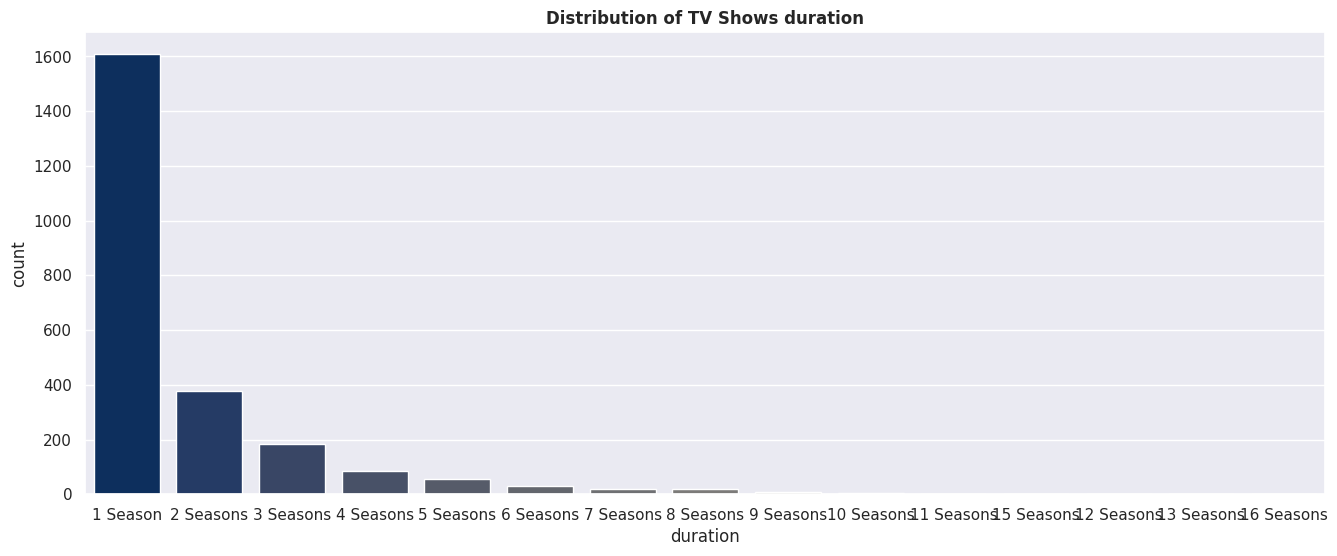

In [35]:
#Checking the distribution of TV SHOWS
plt.figure(figsize=(16,6))
plt.title("Distribution of TV Shows duration",fontweight='bold')
sns.countplot(x=tvshows_data['duration'],data=tvshows_data,order = tvshows_data['duration'].value_counts().index,palette="cividis")

**Tv shows duration**
  * We have most listed duration as **season 1** with **1608** listing.
  * We have second most listed duration as **season 2** with **378** listing.

#### **Check Movie duration:-**

<ipython-input-36-456984128dd3>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




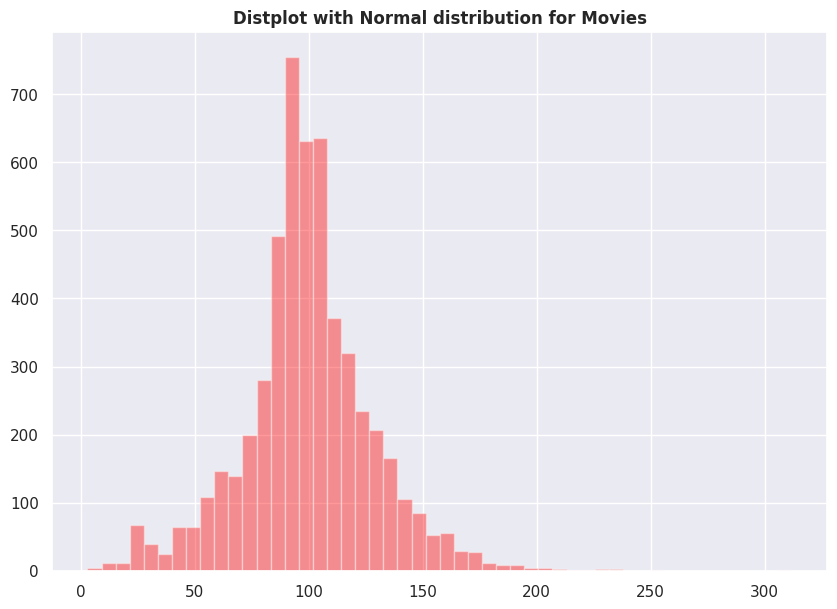

In [36]:
#Checking the distribution of Movie Durations
plt.figure(figsize=(10,7))
sns.distplot(movies_data['duration'].str.extract('(\d+)'),kde=False, color=['red'])
plt.title('Distplot with Normal distribution for Movies',fontweight="bold")
plt.show()

**Movie duration**
  * Mainly the movie duration is in b/w **55** to **150** minutes.
  * Most of the movies list for **90** to **120** minutes.

### **Analysis 'listed_in'(Genere) column:-**

#### **Check genere for movies**

<ipython-input-37-e522a9a59555>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




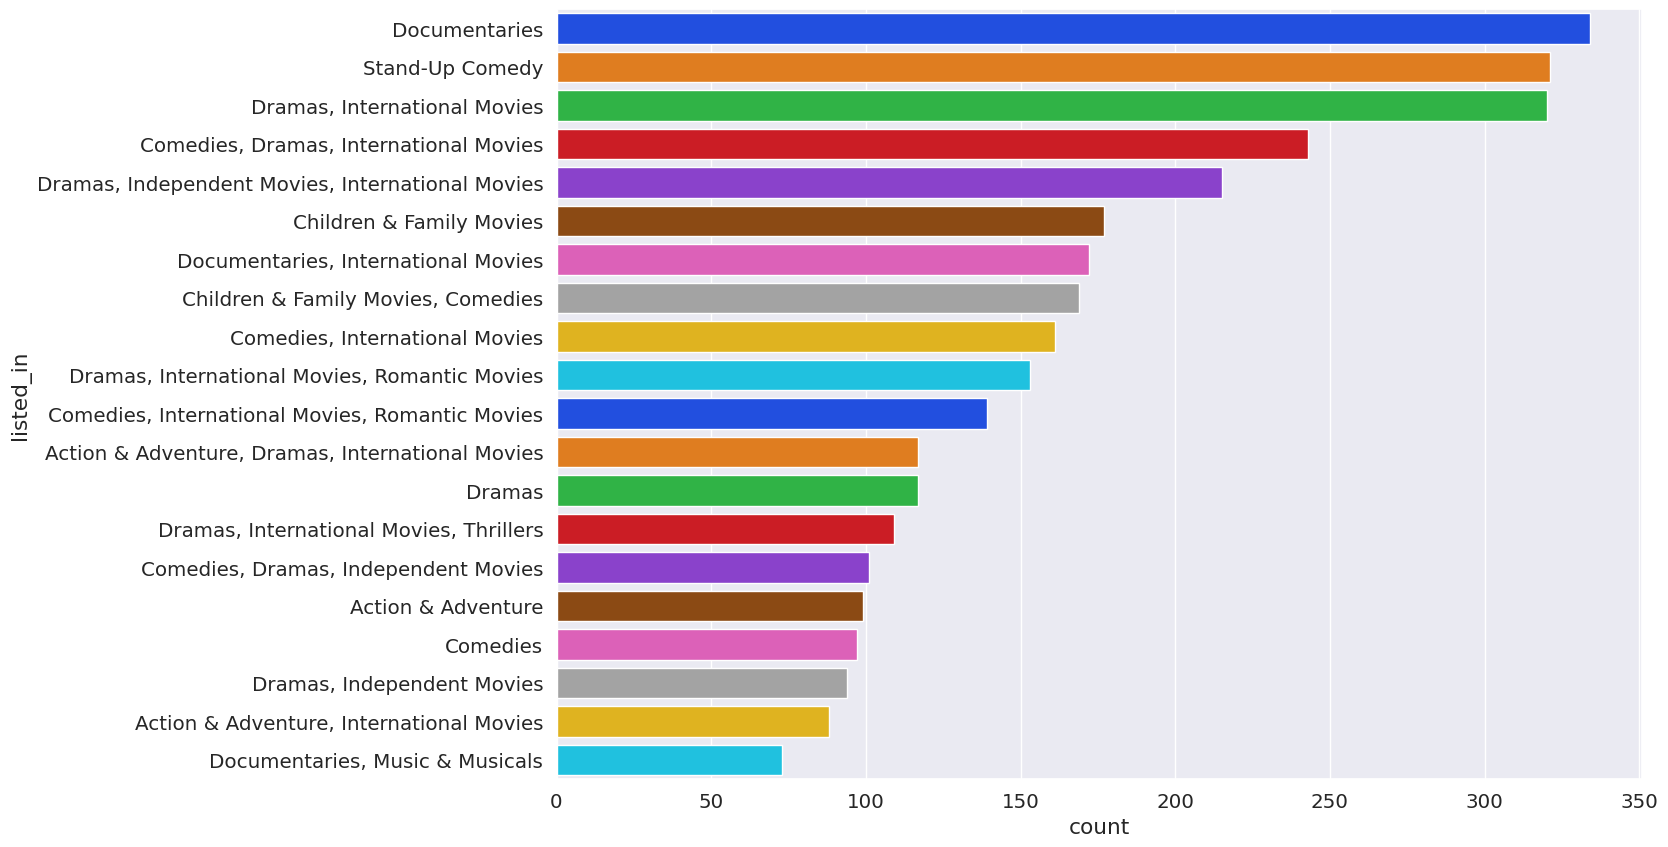

In [37]:
#Plot the graph
plt.figure(figsize = (14, 10))
sns.set_theme(font_scale = 1.3)
sns.countplot(data = data, y = 'listed_in', palette = 'bright', order = data[data['type'] == 'Movie']['listed_in'].value_counts().index[: 20])
plt.show()

**genere for movies**
  * In Movies **Documentaries** is the most popular genere on netflix.
  * **Comedy** is th esecond most popular genere on netflix.

#### **Check genere for TV-Show**

<ipython-input-38-28067f590aef>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




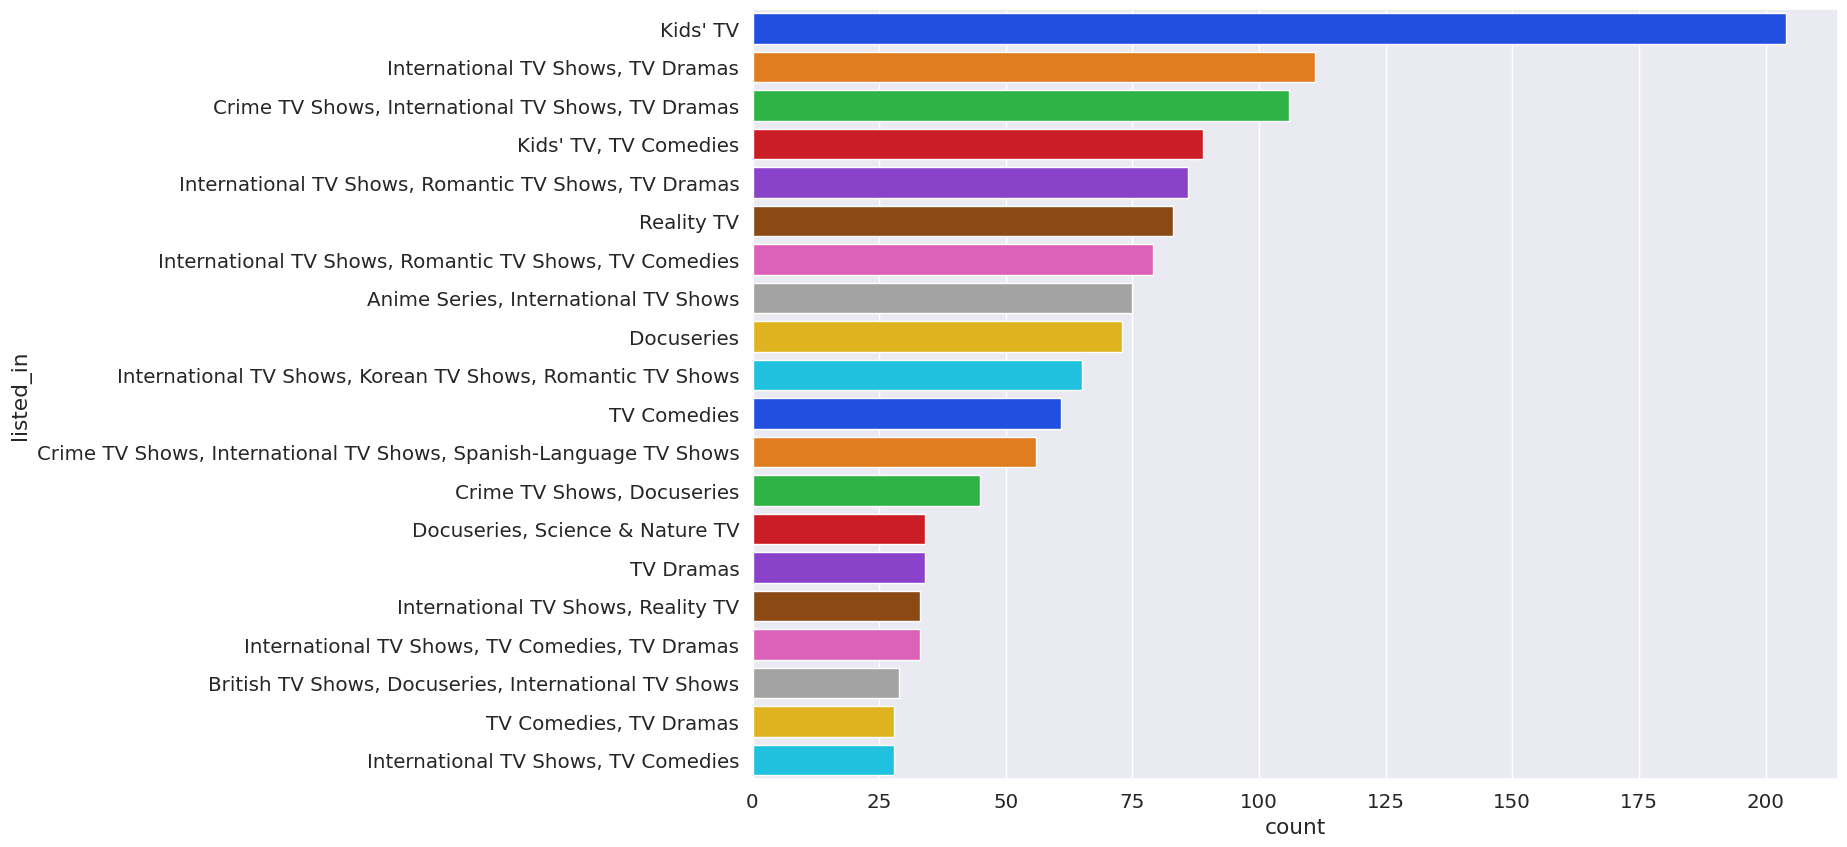

In [38]:
# Plot the graph
plt.figure(figsize = (14, 10))
sns.set_theme(font_scale = 1.3)
sns.countplot(data = data, y = 'listed_in', palette = 'bright', order = data[data['type'] == 'TV Show']['listed_in'].value_counts().index[: 20])
plt.show()

**genere for TV-Show**
  * In TV Shows **Drama** is the most popular genere.
  * **International** TV shows is the second most popular genere.

### **Analysis on 'title' column:-**
**We will create a wordcloud to see which words appear the most in the titles for movies and tv shows.**

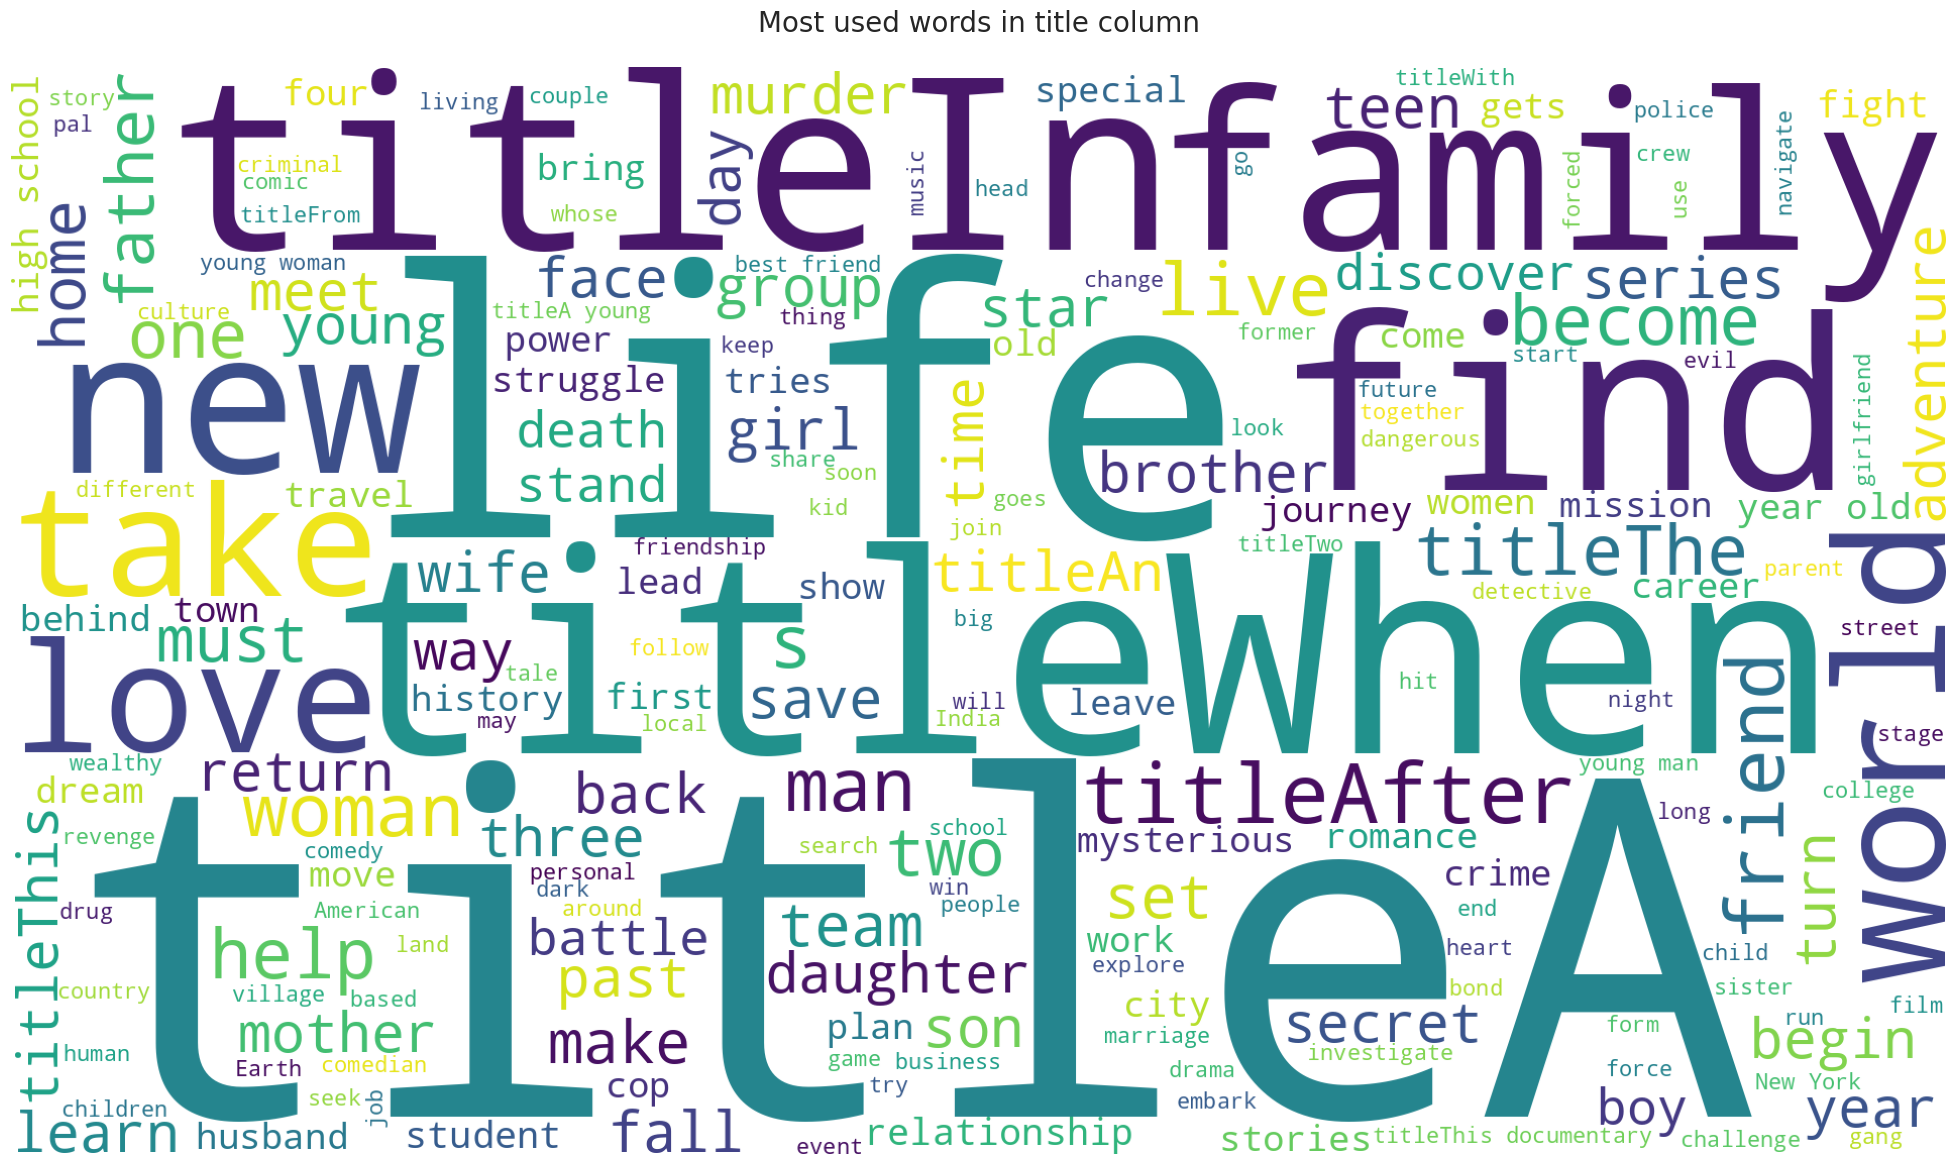

In [39]:
plt.subplots(figsize=(25,15))
# parameters for wordcloud
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate("title".join(data.description))
# Plot the image
plt.title('Most used words in title column', fontsize = 20, pad=25)
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('director.png')
plt.show()


**'title' column**
  * Most repeated words in title column are love, Christmas, World, Man, and life.

### **Analysis on 'description' column:-**
**So we create wordcloud for description column**

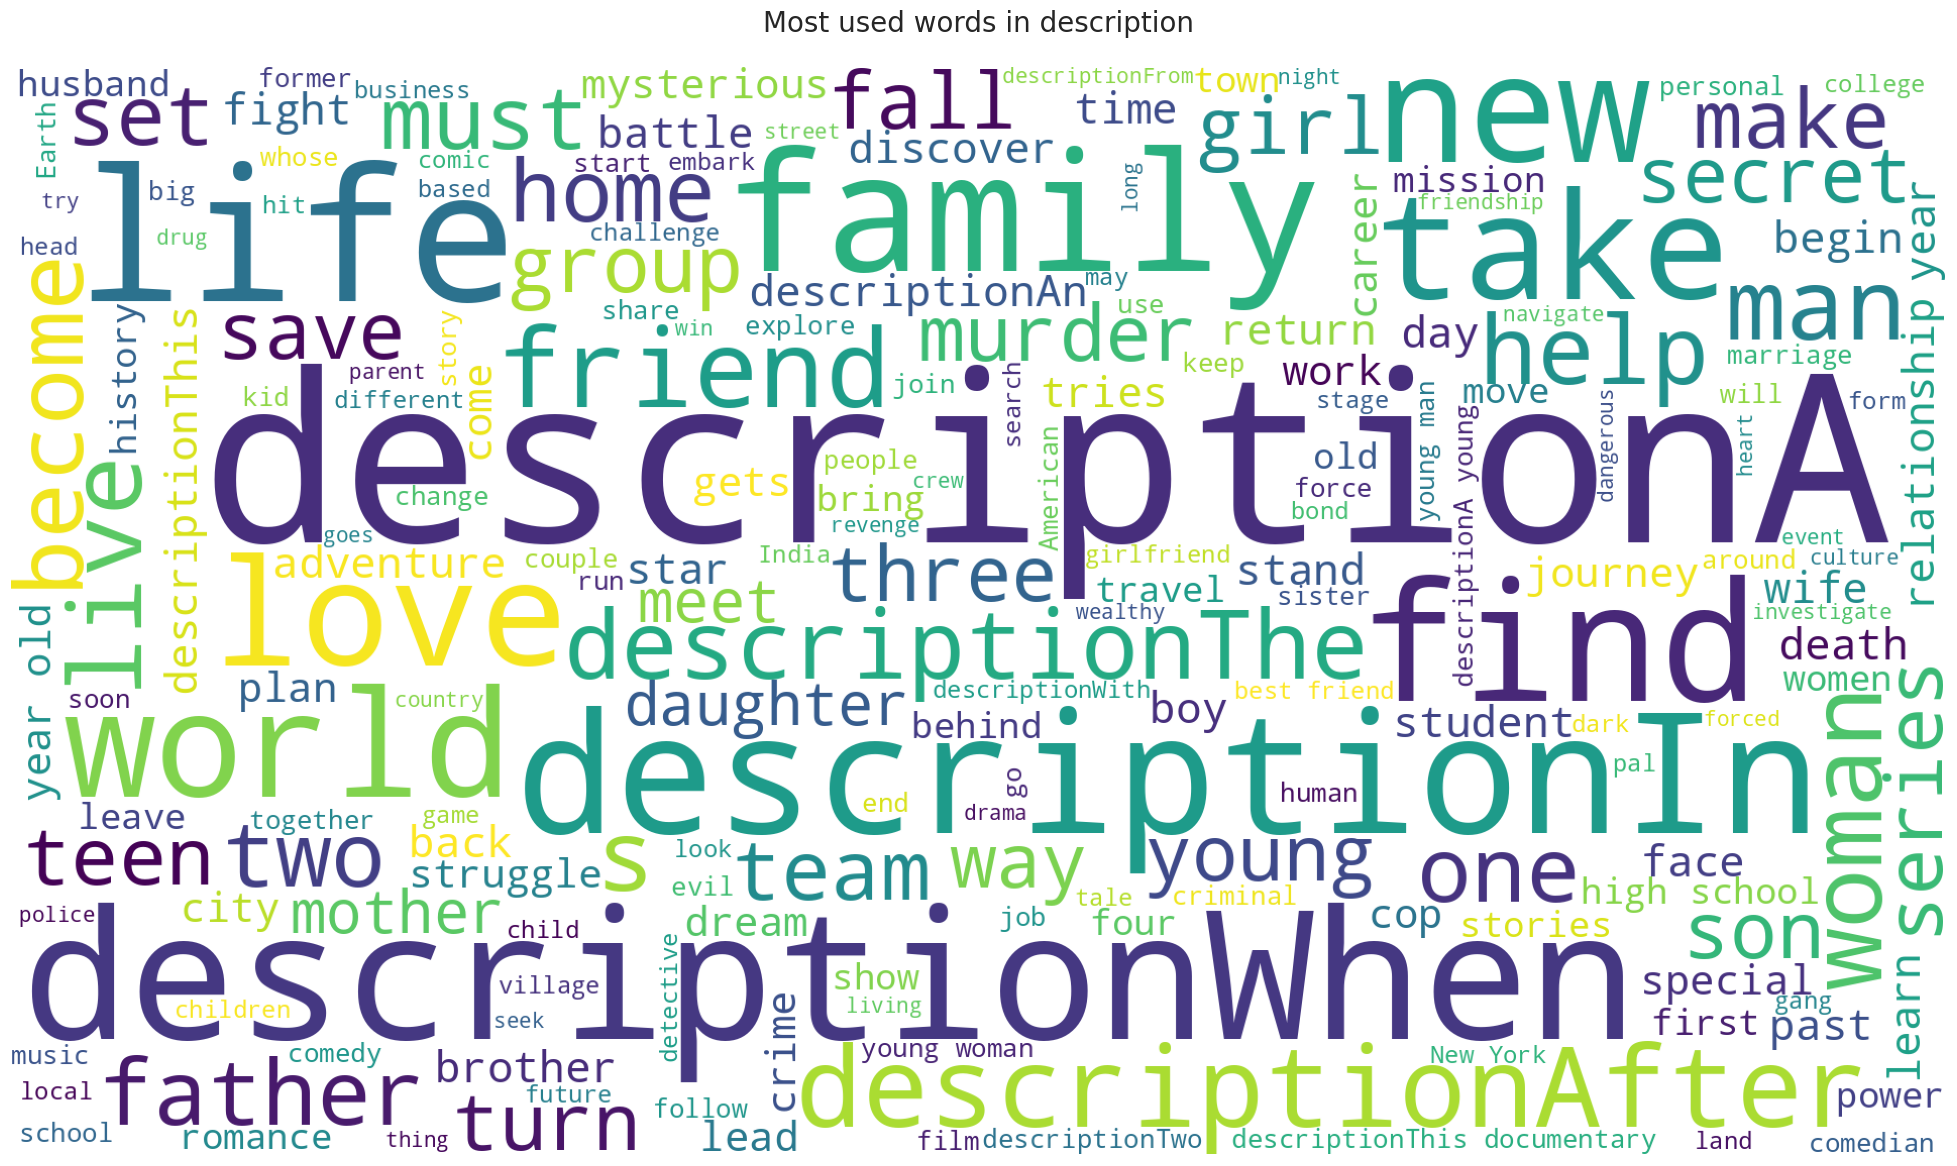

In [40]:
plt.subplots(figsize=(25,15))
# parameters for wordcloud
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate("description".join(data.description))
# Plot the image
plt.title('Most used words in description', fontsize = 20, pad=25)
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('director.png')
plt.show()

**'description' column**
  * Most repeated words in the description of the **tv shows** and **movies** are **Family, new, Love, Life, mother, find**.

## ***4. Feature Engineering & Data Pre-processing***

### **Feature Engineering**

we will add all text based or categorical columns

In [41]:
# We will add all categorical and text based columns
data['text_info'] = data['description'] + ' '+ data['listed_in'] + ' ' + data['rating'] + ' '+ data['country']+ ' ' + data['title'] + ' '+ data['director'] + ' ' + data['cast']

In [42]:
# Checking
data['text_info'][0]

'In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor. International TV Shows, TV Dramas, TV Sci-Fi & Fantasy TV-MA Brazil 3% unknown João Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso Frateschi'

###  **Text cleaning**

In [43]:
#text cleaning function
import re
def clean_text(x):
    return re.sub(r"[^a-zA-Z ]","",str(x))

In [44]:
# Applying above function on our combined column
data['text_info'] = data['text_info'].apply(clean_text)

In [45]:
# we will convert all words in lowercase
data['text_info'] = data['text_info'].str.lower()

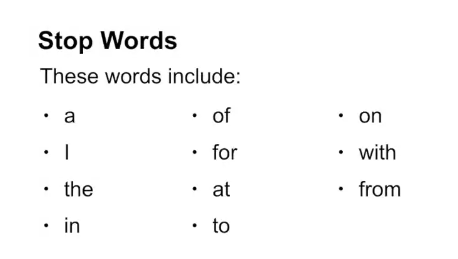

In [46]:
#necessary import for nlp
import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
nltk.download('punkt')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

### **Stemming-**

In [47]:
#stemming
stemmer = SnowballStemmer('english')
stop_words = set(stopwords.words('english'))

In [48]:
# defining a function to filter the words
def filter_words(string, filter_words):
  filtered=[]
  tokens = word_tokenize(string)
  for word in tokens:
    if word not in filter_words:
      filtered.append(stemmer.stem(word))
  return filtered

data['cleaned_text']= ''
for item, row in data.iterrows():
  data.at[item,'cleaned_text'] = filter_words(row['text_info'],stop_words)

data['cleaned_text']

0       [futur, elit, inhabit, island, paradis, far, c...
1       [devast, earthquak, hit, mexico, citi, trap, s...
2       [armi, recruit, found, dead, fellow, soldier, ...
3       [postapocalypt, world, ragdol, robot, hide, fe...
4       [brilliant, group, student, becom, cardcount, ...
                              ...                        
7782    [lebanon, civil, war, depriv, zozo, famili, he...
7783    [scrappi, poor, boy, worm, way, tycoon, dysfun...
7784    [documentari, south, african, rapper, nasti, c...
7785    [dessert, wizard, adriano, zumbo, look, next, ...
7786    [documentari, delv, mystiqu, behind, bluesrock...
Name: cleaned_text, Length: 7777, dtype: object

In [49]:
#join words fun
def join_words(x):
  return " ".join(x)

In [50]:
#final column
data['cleaned_text'] = data['cleaned_text'].apply(join_words)

In [51]:
data.head(2)

show_id     type title           director  \
0      s1  TV Show    3%            unknown   
1      s2    Movie  7:19  Jorge Michel Grau   

                                                cast country date_added  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...  Brazil 2020-08-14   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...  Mexico 2016-12-23   

   release_year rating   duration  \
0          2020  TV-MA  4 Seasons   
1          2016  TV-MA     93 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   

                                         description  year_added  month_added  \
0  In a future where the elite inhabit an island ...      2020.0          8.0   
1  After a devastating earthquake hits Mexico Cit...      2016.0         12.0   

                                           text_info  \
0  in a future where the elite inhabit an island ...   
1  after a devastating earthquake hits mexico cit...   

                                        cleaned_text  
0  futur elit inhabit island paradis far crowd sl...  
1  devast earthquak hit mexico citi trap survivor...

In [52]:
words = data.cleaned_text
words

0       futur elit inhabit island paradis far crowd sl...
1       devast earthquak hit mexico citi trap survivor...
2       armi recruit found dead fellow soldier forc co...
3       postapocalypt world ragdol robot hide fear dan...
4       brilliant group student becom cardcount expert...
                              ...                        
7782    lebanon civil war depriv zozo famili hes left ...
7783    scrappi poor boy worm way tycoon dysfunct fami...
7784    documentari south african rapper nasti c hit s...
7785    dessert wizard adriano zumbo look next willi w...
7786    documentari delv mystiqu behind bluesrock trio...
Name: cleaned_text, Length: 7777, dtype: object

### **using TF-IDF**
Term frequency-inverse document frequency is a text vectorizer that transforms the text into a usable vector.

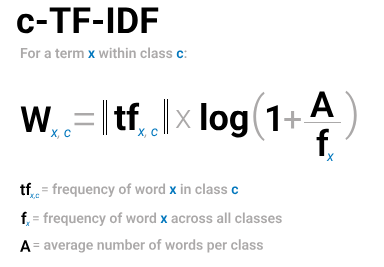

In [53]:
#using tfidf
from sklearn.feature_extraction.text import TfidfVectorizer
t_vectorizer = TfidfVectorizer(max_df = 0.9,min_df = 1, max_features=15000)
X= t_vectorizer.fit_transform(words)

In [54]:
X

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 258634 stored elements and shape (7777, 15000)>

### **Applying PCA-Principal Component Analysis to reduce dimensions.**

In [55]:
#PCA Code
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
transformer = PCA()
transformer.fit(X.toarray())

PCA()

### **Cumulative Explained Variance**

Text(0, 0.5, 'cumulative explained variance')

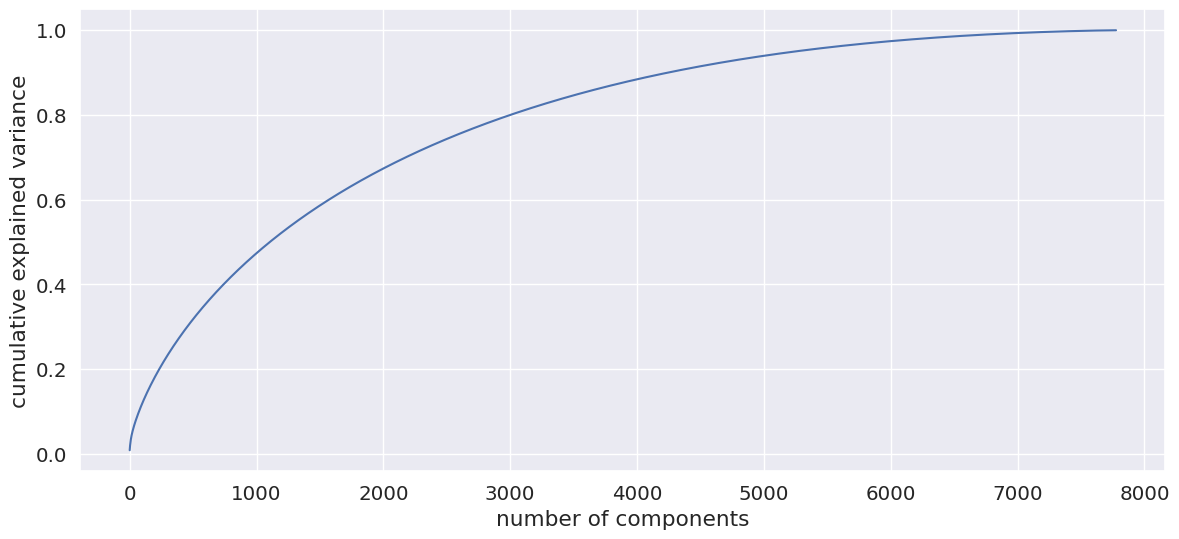

In [56]:
 #explained var v/s comp
plt.plot(np.cumsum(transformer.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

**We will use 3000 components**

In [57]:
#choosing right dim from plot, this might take a while, for ready ans use n_components = 3000
from sklearn.decomposition import PCA
transformer = PCA(n_components=3000)
transformer.fit(X.toarray())
X_transformed = transformer.transform(X.toarray())
X_transformed.shape

(7777, 3000)

In [58]:
# vectorizing the test and train
X_vectorized = t_vectorizer.transform(words)

In [59]:
#applying pca
X= transformer.transform(X_vectorized.toarray())

In [60]:
X

array([[ 0.10281904, -0.02168678, -0.01396732, ...,  0.00029166,
        -0.00941044, -0.01275644],
       [-0.04549745, -0.03803575,  0.0080241 , ..., -0.00171233,
        -0.00717384,  0.00758629],
       [-0.05171459, -0.03977664, -0.04179814, ...,  0.00539594,
         0.00724446, -0.00551572],
       ...,
       [-0.04981065,  0.06920836,  0.24236937, ..., -0.01592565,
         0.01275675,  0.00173255],
       [ 0.06938643,  0.01001797,  0.01974952, ..., -0.00875336,
         0.01127445,  0.00108217],
       [-0.05696996,  0.17493726,  0.2635102 , ..., -0.00094726,
         0.00861205,  0.01446631]])

In [63]:
# go, went, gone
# go, go,go

## ***5. Cluster Model Implementation***

### **Silhouette Score Elbow for KMeans Clustering**

In [ ]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import KElbowVisualizer


# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(4,22), metric='silhouette', timings=False
)

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()

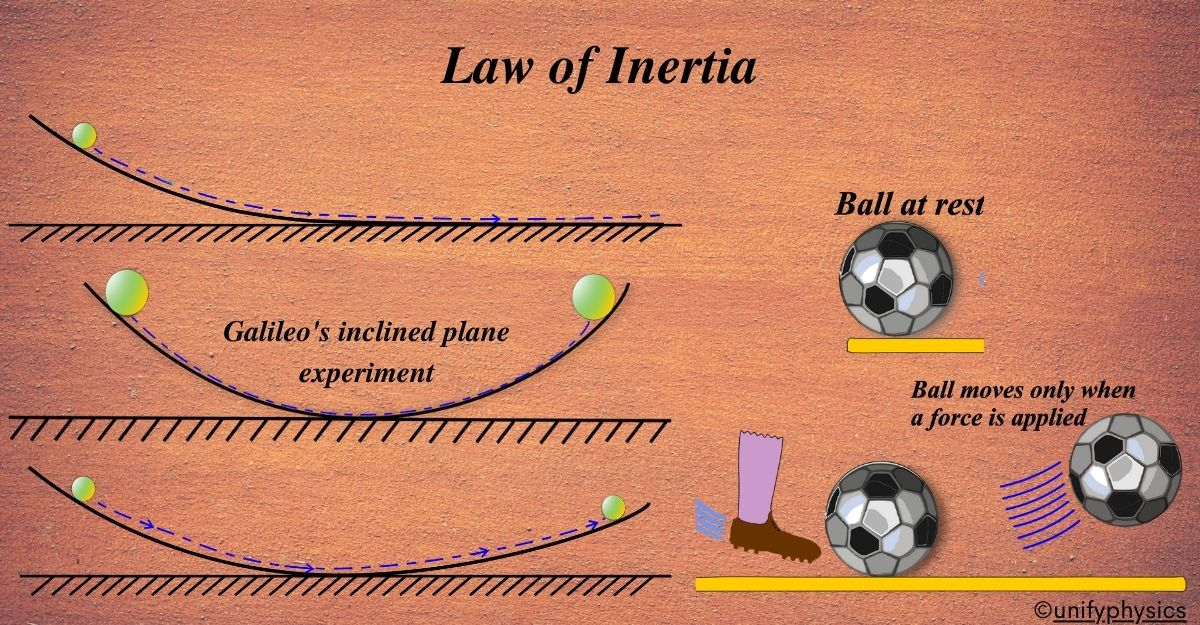

In [ ]:
# We will plot the graph to get the no. of clusters
wcss = []
for i in range(1, 22):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 22), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

* **we will take no. of clusters as 15**

### **Dendogram**

In [ ]:
# Plot the dendogram
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(13,8))


dendrogram = sch.dendrogram(sch.linkage(X, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

#check for largest distance vertically without crossing any horizontal line

### **Agglomerative Clustering**

In [ ]:
# Let's  import AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 15, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

In [ ]:
# Visualizing the clusters (three dimensions only)
plt.figure(figsize=(13,8))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = '1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = '2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = '3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'yellow', label = '4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = '5')
plt.scatter(X[y_hc == 5, 0], X[y_hc == 5, 1], s = 100, c = 'cyan', label = '6')
plt.scatter(X[y_hc == 6, 0], X[y_hc == 6, 1], s = 100, c = 'black', label = '7')
plt.scatter(X[y_hc == 7, 0], X[y_hc == 7, 1], s = 100, c = 'lime', label = '8')
plt.scatter(X[y_hc == 8, 0], X[y_hc == 8, 1], s = 100, c = 'salmon', label = '9')
plt.scatter(X[y_hc == 9, 0], X[y_hc == 9, 1], s = 100, c = 'brown', label = '10')
plt.scatter(X[y_hc == 10, 0], X[y_hc == 10, 1], s = 100, c = 'plum', label = '11')
plt.scatter(X[y_hc == 11, 0], X[y_hc == 11, 1], s = 100, c = 'aqua', label = '12')
plt.scatter(X[y_hc == 12, 0], X[y_hc == 12, 1], s = 100, c = 'hotpink', label = '13')
plt.scatter(X[y_hc == 13, 0], X[y_hc == 13, 1], s = 100, c = 'pink', label = '14')
plt.scatter(X[y_hc == 14, 0], X[y_hc == 14, 1], s = 100, c = 'gold', label = '15')

plt.title('Clusters of content')

plt.legend()
plt.show()

In [ ]:
# Check Silhouette Score for each cluster
from sklearn.cluster import AgglomerativeClustering
silhouette_score_ = [  ]
range_n_clusters = [i for i in range(2,16)]
for n_clusters in range_n_clusters:
    clusterer = AgglomerativeClustering(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    #centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    silhouette_score_.append([int(n_clusters) , round(score , 3)])
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

### **KMeans Clustering**

#### **Model fitting**

In [ ]:
# fitting the k means algorithm on lower features

kmeans= KMeans(n_clusters=15, init= 'k-means++',max_iter=300, n_init=1)
kmeans.fit(X)

**calculating silhouette score**

In [ ]:
from sklearn.metrics import silhouette_score
print("Silhouette Coefficient:  %0.3f"%silhouette_score(X, kmeans.labels_))

**Predicting**

In [ ]:
#predict the labels of clusters.
label = kmeans.fit_predict(X)

In [ ]:
#Getting unique labels
u_labels = np.unique(label)

#plotting the results:
for i in u_labels:
    plt.scatter(X[label == i , 0] , X[label == i , 1] , label = i)
plt.rcParams["figure.figsize"] = (20,8)
plt.legend()
plt.show()

**we now assign our clusters in our dataset by creating a new column "clusters"**

In [ ]:
# Assigning clusters to our data
data['clusters'] = kmeans.labels_

In [ ]:
# checking how it is working
data.head(2)

**Counting Movies/TV shows assigned to each cluster**

In [ ]:
# COunting content in each cluster
cluster_content_count = data['clusters'].value_counts().reset_index().rename(columns={'index':'clusters','clusters':'Movies/TV_Shows'})
cluster_content_count

#### **Check all clusters**

In [ ]:
#word cloud imports
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

**Defining a function to explore all the cluster using word cloud**

In [ ]:
#word cloud for user rating review
def word_count(category):
  print("Exploring Cluster", category)
  col_names = ['type','title','country','rating','listed_in','description']
  for i in col_names:
    df_word_cloud = data[['clusters',i]].dropna()
    df_word_cloud = df_word_cloud[df_word_cloud['clusters']==category]
    text = " ".join(word for word in df_word_cloud[i])
    # Create stopword list:
    stopwords = set(STOPWORDS)
  # Generate a word cloud image
    wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(text)
  # Display the generated image:
  # the matplotlib way:
    plt.rcParams["figure.figsize"] = (10,6)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")

    print("Looking for insights from", i ,"of Movies/TV Shows")
    plt.show()

##### **Analysis of cluster 0:-**

In [ ]:
#Analysis of cluster 0
word_count(0)

**Analysis of cluster 0**

  * Type - Movie, TV Show

  * Title- Naruto, high, girl, low, movie, dragon, bleach, fate, battle

  * Countries- Japan, US, India

  * Ratings- TV-MA, PG, Y7

  * Genres- International TV series- Anime

  * Description- family, world, human, friend

##### **Analysis of cluster 1:-**

In [ ]:
#Analysis of cluster 1
word_count(1)

**Analysis of cluster 1**

  * Type - Movies, TV Show

  * Title- master, love, drogan, aur, mumbai, singh

  * Countries- India, China, Hongcong

  * Ratings- TV-MA, pg

  * Genres- International movies, Dramas, Action

  * Description- family, man, love, india, woman, find

##### **Analysis of cluster 2:-**

In [ ]:
#Analysis of cluster 2
word_count(2)

**Analysis of cluster 2**

  * Type - Movies, TV Show

  * Title- club, spain, live, holy

  * Countries- spain, mexico, france

  * Ratings- TV-MA, NR, PG

  * Genres- Dramas International , show International

  * Description- family, young, secret, story

##### **Analysis of cluster 3:-**

In [ ]:
#Analysis of cluster 3
word_count(3)

**Analysis of cluster 3**

  * Type - Movies,TV Show

  * Title- Girl, man, love, monstar, holiday etc

  * Countries- United states,United kingdom, japan etc

  * Ratings- TV-MA,PG etc

  * Genres- family movies, movie comedies etc

  * Description- find, save, find, new, school, etc

##### **Analysis of cluster 4:-**

In [ ]:
#Analysis of cluster 4
word_count(4)

**Analysis of cluster 4**

  * Type - TV Shows, Movies etc.

  * Title- Power rangers, adventure, stories, rescue, bheem, little, monster etc.

  * Countries- US, France, UK, Japan etc.

  * Ratings- TV-Y7 etc.

  * Genres- Kids shows-comedy,korean etc.

  * Description-adventure, friend, world, anime etc.

##### **Analysis of cluster 5:-**

In [ ]:
#Analysis of cluster 5
word_count(5)

##### **Analysis of cluster 6:-**

In [ ]:
#Analysis of cluster 6
word_count(6)

**Analysis of cluster 6**

  * Type - TV Shows

  * Title- world, killer, nature, murder, inside, history, story

  * Countries- US, UK

  * Ratings- TV-MA

  * Genres-Documentary International TV shows

  * Description- explore, documentary, series, world, reveal

##### **Analysis of cluster 7:-**

In [ ]:
#Analysis of cluster 7
word_count(7)

**Analysis of cluster 7**

  * Type - Movies

  * Title- Story, Nova, life, world, secret, american

  * Countries- US, UK

  * Ratings- TV-PG

  * Genres- Documentary International Movies

  * Description- documentary, life, live, explore, history, family

##### **Analysis of cluster 8:-**

In [ ]:
#Analysis of cluster 8
word_count(8)

**Analysis of cluster 8**

  * Type - Movies

  * Title- war, kill, black, world, dragon, last

  * Countries- US, UK, Hogkong

  * Ratings- TV-MA, TV-PG

  * Genres-Action Adventure, sci-fi fantasy

  * Description- find, take, team, must, force, save, young cop, group

##### **Analysis of cluster 9:-**

In [ ]:
#Analysis of cluster 9
word_count(9)

##### **Analysis of cluster 10:-**

In [ ]:
#Analysis of cluster 10
word_count(10)

**Analysis of cluster 10**

  * Type - Movies

  * Title- Live, special, stand, show, time, comedy

  * Countries- US, UK

  * Ratings- TV-MA

  * Genres- standup comedy, comedy

  * Description- comedian, standup, somic, special, comedy

##### **Analysis of cluster 11:-**

In [ ]:
#Analysis of cluster 11
word_count(11)

  **Analysis of cluster 11**

  * Type - TV Shows

  * Title- first, love, city, man, sol

  * Countries- South Korea

  * Ratings- TV-MA

  * Genres- Korean TV shows

  * Description- life, new, love, korean, find

##### **Analysis of cluster 12:-**

In [ ]:
#Analysis of cluster 12
word_count(12)

**Analysis of cluster 12**

* Type - TV Shows

* Title- Nailed, Big, Love, Terrace, House

* Countries- US, UK

* Ratings- TV-MA

* Genres- Reality TV shows

* Description- host, compet, competit, realiti, home

##### **Analysis of cluster 13:-**

In [ ]:
#Analysis of cluster 13
word_count(13)

**Analysis of cluster 13**

* Type - Movies

* Title- Good, Son, Land, Mission

* Countries- Egypt, UAE

* Ratings- TV-MA

* Genres- International movies, Dramas, Comedies

* Description- life, man, woman, find, love

##### **Analysis of cluster 14:-**

In [ ]:
#Analysis of cluster 14
word_count(14)

**Analysis of cluster 14**

  * Type - TV Shows

  * Title- Love, Girl, Game

  * Countries- US, UK

  * Ratings- TV-MA

  * Genres- International shows, Dramas

  * Description- family, find, love, life

### **Evaluation Metrics**

#### **Silhouette Score -**

In [ ]:
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm

In [ ]:
range_n_clusters = [i for i in range(2,16)]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

# **Conclusion:-**

## **1- Data Overview**

**1- Data Overview**
  * We have 7787 rows and 12 columns provided in the data.

  * In the dataset we have 11 object columns and 1 integer column as release_year.

**2- Checking the null values**
  * Fist we have 2389 null values in director column.We have almost 30% null values in this column so we can not use this column in model training but we can use it in EDA.

  * We have 718 null values in cast column. and it can be replaced with 'unknown'.

  * we have 507 null values in country column.Replacing nulls with 'mode'.

  * Also we have 10 null values in date_added column.we have few rows of date_added so we can 'drop' these rows.

  * Also we have 7 null values in rating column.Replacing nulls with 'mode'.

**3- Check Duplicate values in the dataset**

  * we do not have any Duplicate values in the dataset.


---



## **2- Exploratory Data Analysis**

**type column**
  * According to the graph we have 5377(69.14%) movies

  * And 2400(30.86%) as TV Show in this dataset.

**'director' column**
  * According to plot we can say Raul Campos and Jan Sulter collectively have the most content on Netflix.
  * Marcus Raboy have the second most content on Netflix.

**'cast' column**
  * Now we can say in this data Anupam Kher having 38 number of listing.
  * Takahiro Sakurai is the second most listed actor on netflix.
  * Shah Rukh Khan is the 3rd most listed actor on netflix.

**'country' column**
  * According to the plot we can understanding United States have 2080 Movies and	975 TV Show

  * INDIA have second most listed country with 852 movies and	71 TV Show on Netflix.

**'date_added' column:-**

  * We have so many content relese in October(785), November(738), December(833) and January(757) may be it is because of Holiday season.
  * The number of release have significantly increased after 2015 to 2020
  * Bul sudden drop in 2021 may be it is because of covid 19.

**'release_year' column**
  * We have 744 movies and	268 TV Show relese in 2017

  * Also 734 movies and	386 TV Show relese in 2018

  * 82%(6431) of the content was released between 2010 and 2021
  * 17.28%(1346) of the content was released before 2010.

**'Rating" column**

  * Most number of movies rated TV-MA i.e. Adult Rating

  * Most number of TV Shows rated TV-MA i.e. Adult Rating

**Tv shows duration**
  * We have most listed duration as season 1 with 1608 listing.
  * We have second most listed duration as season 2 with 378 listing.

**Movie duration**
  * Mainly the movie duration is in b/w 55 to 150 minutes.
  * Most of the movies list for 90 to 120 minutes.

**genere for movies**
  * In Movies Documentaries is the most popular genere on netflix.
  * Comedy is th esecond most popular genere on netflix.

**genere for TV-Show**
  * In TV Shows Drama is the most popular genere.
  * International TV shows is the second most popular genere.

**'title' column**
  * Most repeated words in title column are love, Christmas, World, Man, and life.

**'description' column**

  * Most repeated words in the description of the tv shows and movies are Family, new, Love, Life, mother, find


---


## **3- Data pre-processing**

**1- Feature Engineering**
  * For train the model we use description column, listed_in column, rating column, country column, title column, director column, cast column.

**2- We performe Text cleaning as our next step**
  * convert all words in lowercase.

**3- We performe Stemming as our next step**
  * We remove all stopwords.
  * Also use stemming function.

**4- We performe TF-IDF vectorizer**
  * Term frequency-inverse document frequency is a text vectorizer that transforms the text into a usable vector.

**5- Applying PCA-Principal Component Analysis to reduce dimensions.**
  * We will use 3000 components



---


## **3- Applying models**

**1- Find the value of clusters**
  * WE use Elbow method for finding k values.
  * Also use Silhouette Score for best score.
  * Also use Dendogram for finding the value of clusters.
  
**2- Use Agglomerative Clustering**

**3- Use KMeans Clustering**

Here are few clusters with there word cloud graph

**Analysis of cluster 0**

  * Type - Movie, TV Show

  * Title- Naruto, high, girl, low, movie, dragon, bleach, fate, battle

  * Countries- Japan, US, India

  * Ratings- TV-MA, PG, Y7

  * Genres- International TV series- Anime

  * Description- family, world, human, friend

**Analysis of cluster 1**

  * Type - Movies, TV Show

  * Title- master, love, drogan, aur, mumbai, singh

  * Countries- India, China, Hongcong

  * Ratings- TV-MA, pg

  * Genres- International movies, Dramas, Action

  * Description- family, man, love, india, woman, find

**Analysis of cluster 2**

  * Type - Movies, TV Show

  * Title- club, spain, live, holy

  * Countries- spain, mexico, france

  * Ratings- TV-MA, NR, PG

  * Genres- Dramas International , show International

  * Description- family, young, secret, story

**Analysis of cluster 3**

  * Type - Movies,TV Show

  * Title- Girl, man, love, monstar, holiday etc

  * Countries- United states,United kingdom, japan etc

  * Ratings- TV-MA,PG etc

  * Genres- family movies, movie comedies etc

  * Description- find, save, find, new, school, etc

**Analysis of cluster 4**

  * Type - TV Shows, Movies etc.

  * Title- Power rangers, adventure, stories, rescue, bheem, little, monster etc.

  * Countries- US, France, UK, Japan etc.

  * Ratings- TV-Y7 etc.

  * Genres- Kids shows-comedy,korean etc.

  * Description-adventure, friend, world, anime etc.

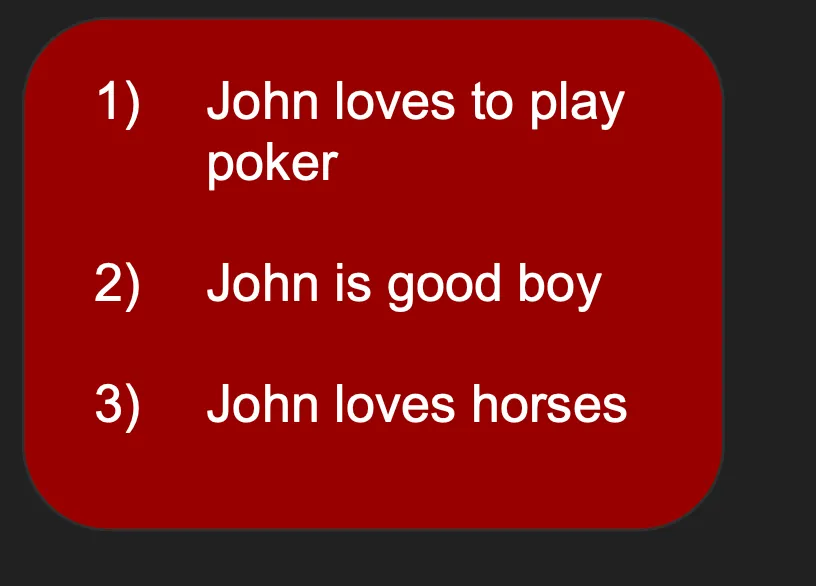

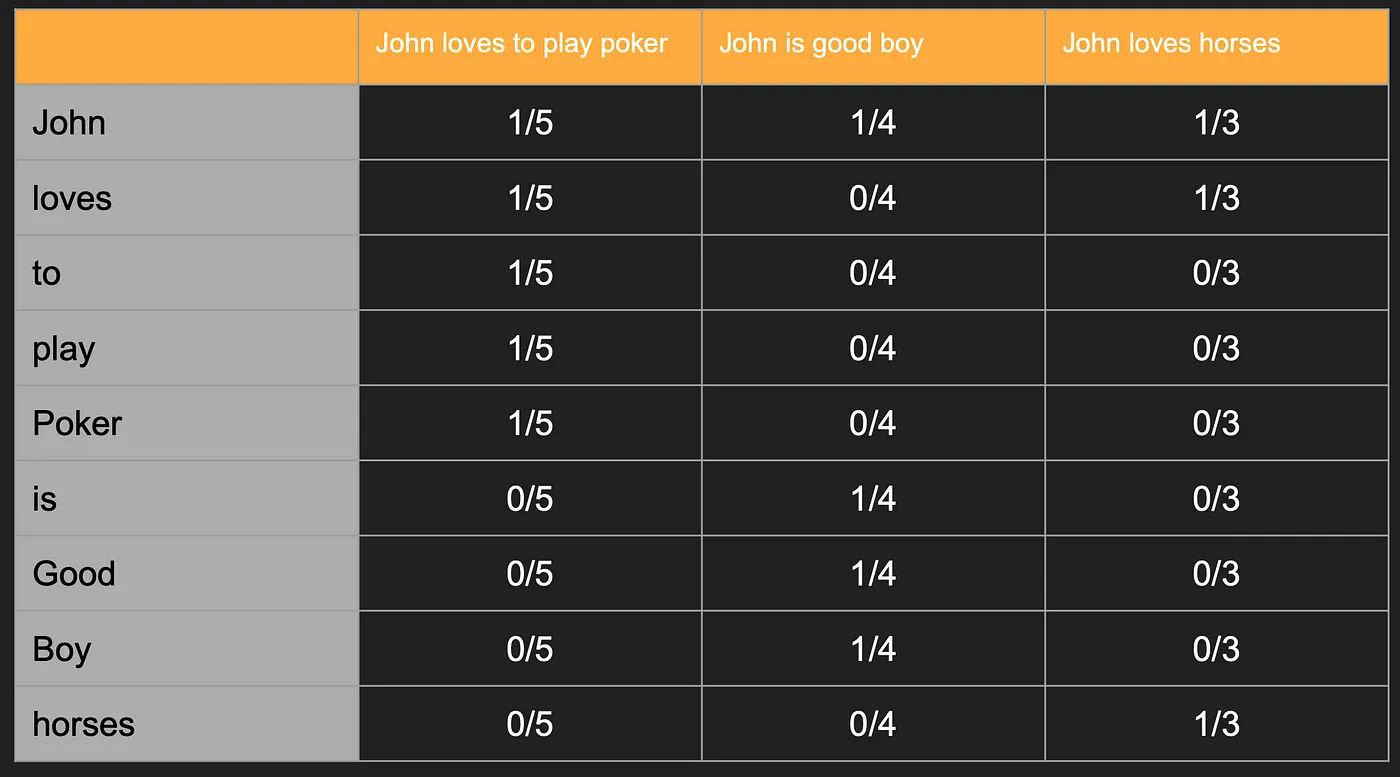

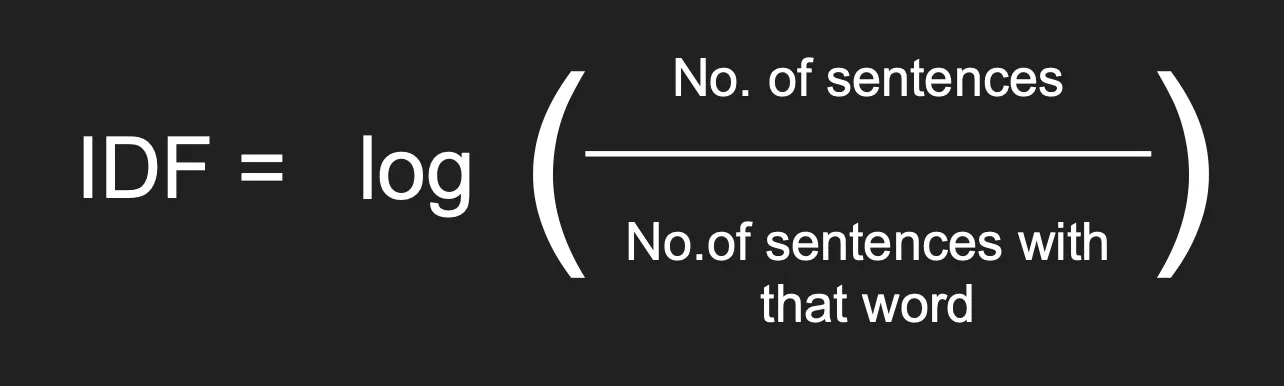

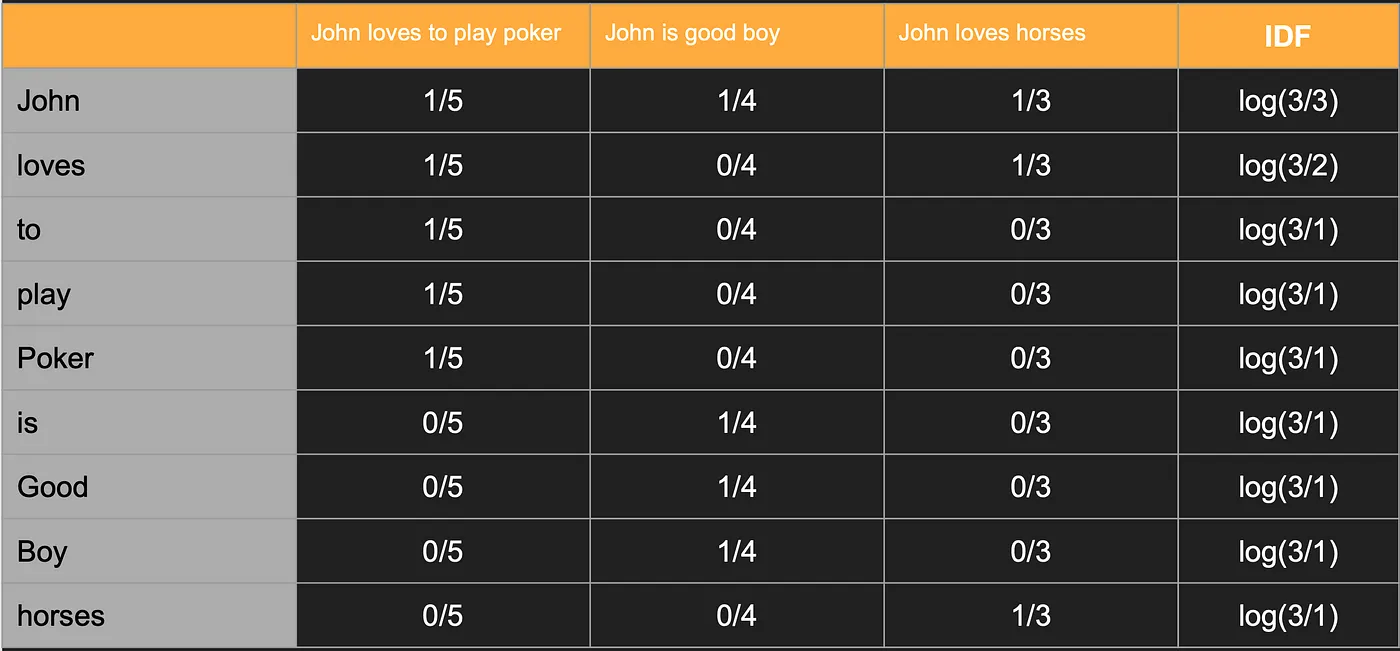